# Simple Harmonic Motion: Zero Drag
#### Report Due: April 21, 2020 5pm
Consider a pendulum consisting of a dense sphere of negligible radius, at the end of a very light rigid stick.<br>
Assume that the end of the stick is attached to a frictionless pivot that allows the pendulum to rotate<br>
through $2\pi$ radians. This project is designed to use python to investigate such a pendulum, and <br>
to see the following:
1. the difference between the Euler, Euler-Cromer, and 2nd Order Runge-Kutta methods when applied to this system
2. the limits of the "simple pendulum approximation"
3. An first experience with phase space plots.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
plt.style.use('dark_background')
plt.rc('text', usetex=True)
plt.rcParams["figure.figsize"] = (10,8)

## Physical description of the system
Edit this cell to include the following: <br>

A beautiful markdown discussion of the physics of the pendulum (use $\LaTeX$ for the equations!)  

Include an image of the pendulum with the mass, length, and angle $\theta$ of the pendulum shown.  

Make sure the figure also shows the two forces (tension and gravity) acting on the pendulum.  

The discussion should end with a set of equations used to calculate $\omega_{i+1}$ and $\theta_{i+1}$

##### This is my markdown cell with my groovy pendulum image

<img src="untitled1.svg" width="280" align="center"/>

In [3]:
def dΩdt(θ, Δt, L, g = 9.80):
    """
    This function returns the change in angular velocity with respect to time,
    given the variables:
    θ - angular motion in the direction perpendicular to the Tension of the 
    pendulum, 
    L - The length of the pendulum's "massless rigid stick", 
    Δt - the time-step we choose, and
    g - the constant of earth-acceleration 
    """    
    return -(g/L*θ)*Δt

In [7]:
def run_sim_pendulum(θ_zero, Ω_zero, Δt, g=9.80, L=0.1, m = 1., method = 'euler'):
    
    """
    This function runs a simulation of a pendulum consisting of a dense sphere
    of negligible radius, at the end of a very light rigid stick.
    We Assume that the end of the stick is attached to a frictionless pivot
    that allows the pendulum to rotate through  2𝜋  radians. 
    The function uses the Euler method of integration
    and an assumption that the starting angle is "small" ( 𝜃0<=𝜋/8 ), 
    It calculates the total energy (kinetic plus potential) of the pendulum 
    as a function of time. 
    Finally, it plots ENergy vs Time.

    Inputs:
    θ_zero - initial starting angle (degrees)
    Ω_zero - initial angular velocity (radians-per-second)
    Δt - the incremental change in time (seconds).
    g = 9.80 m/s^2 - earth gravity
    L = 0.1 - the length of the rigid stick (in meters)
    m = 1.0 - the mass of the dense sphere (in kg) 
    method - We set this up to build on the function and use it to select between
    one of three methods, the Euler, Euler-Cromer or Runge-Kutta
    

    Returns:
    t - a list of the time intervals between launch and when the particle hits the ground
    θ - a list of the positions of the sphere, in circular motion with reference to 
    the top of the pendulum (degrees)
    Ω - a list of the angular velocities corresponding with the above time and position list
    E - a list of the total Energy (kinetic plus potential) of the system (Joules)
    """
    
    θ = [θ_zero] # sets up the list of positions in degrees.
    Ω = [Ω_zero] # sets up the list of angular velocities
    t = [0.0] # sets up the list of times
    T = 2*np.pi/np.sqrt(L/g) # The Period of the pendulum system
    E = [(0.5*m*(L**2)*(Ω[-1]**2) + 0.5*m*g*L*(θ[-1]**2))] # sets up a list of Total Energy
    
 
    """
    This while loop will now calculate 
    omega_{i+1} and theta_{i+1}
    """
    
    while t[-1] <= 5*T:  # My while loop for the Euler method. It runs for 5 periods.
        if method == 'euler':
            Ω.append( Ω[-1] + (dΩdt(θ[-1],Δt,L)*Δt))
            θ.append( θ[-1] + Ω[-2] * Δt )
            t.append( t[-1] + Δt )
            E.append(0.5*m*(L**2)*(Ω[-1]**2) + 0.5*m*g*L*(θ[-1]**2))
            
    
    plt.plot(t, E, linewidth=1, alpha=1, color='yellow', label = r'$Energy\;\;\mathrm{(Joules)}$')
    plt.ylabel(r'$Energy\;\;\mathrm{(J)}$', {'color': 'C0', 'fontsize': 18})
    plt.xlabel(r'$Time\;\;\mathrm{(s)}$', {'color': 'C0', 'fontsize': 18} )
    plt.grid(color='g', linestyle='-', linewidth=0.75, alpha = 0.5)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.show()
    
    return t, Ω, θ, E

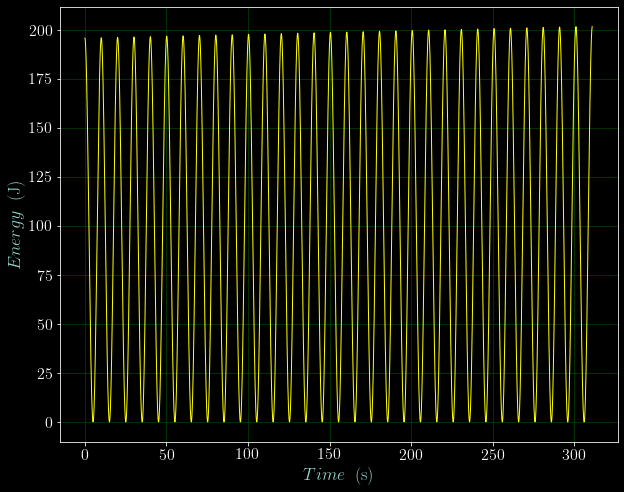

In [10]:
t, Ω, θ, E = run_sim_pendulum(20,0, 0.001)

COMMENT:

#####  We see above that energy is not conserved (fluctuates between 0 and 200 Joules), which is understandable, considering an initial angular position of 20 degrees.

## Euler vs Euler-Cromer vs 2nd order Runge-Kutta
In this section, I want you to investigate the stability of the Euler and the Euler-Cromer methods<br>
as applied to the pendulum. Using a small starting angle ($\theta_0 <=\pi/8$), calculate the total energy<br>
(kinetic plus potential) of the pendulum as a function of time. Show a plot or plots that clearly<br>
illustrate the difference between the two methods.<br>

### Questions to answer:
- Which method is better for numerically solving the simple pendulum? Explain! 
- Does the Euler method conserve energy?
- Does the Euler-Cromer method conserve energy? Explain. 
- Does the 2nd order Runge-Kutta method conserve energy?

## Removing the finite amplitude approximation
Now, let's remove the finite amplitude approximation (i.e. don't replace $\sin\theta$ with $\theta$).<br>
Rewrite your equations used to compute $\omega_{i+1}$ and $theta_{i+1}$, and then investigate the<br>
behavior of this system for several different scenarios; in particular, make plots of $\theta$ vs $t$ and $\omega$ vs $t$<br>
for the following initial conditions:
- $\theta_0 = \pi/3$ rad and $\omega_0 = 0$ rad/s
- $\theta_0 = \pi/3$ rad and $\omega_0 = +\pi/3$ rad/s<br>

The second scenario will likely give you an odd plot because the pendulum will be able to "loop-the-loop".<br> 
To be able to better compare the two plots, modify the second plot (you'll have to alter your computational<br>
code) to use what are called **periodic boundary** conditions. In periodic boundary conditions, we consider<br>
a range of angles from $[-\pi, +\pi]$ instead of $[0, \infty]$. To implement this, you need to do two things <br>
depending on the motion of the pendulum:<br>
- when $\theta$ passes $+\pi$ radians, with positive $\omega$, subtract $2\pi$ from the current angle.
- when $\theta$ passes $-\pi$ radians, with negative $\omega$, add $2\pi$ to the current angle.<br>
Implement this scenario and replot the case where $\theta_0 = \pi/3$ rad and $\omega_0 = +\pi/3$ rad/s<br>

### Here I remove the finite approximation:

DRAFT:

$$\frac{dv}{dt} = -(g+ \frac{b}{m} v)$$

$$ vy = (v0 + \frac{gm}{b})e^{-b t/m}  -\frac{gm}{b}$$

$$ and (where \frac{b}{m} = 1 ) $$

$$ vy = (v0 + g)e^{-t} - g $$

$$ and $$

$$ y = y0 -(g + v0)(e^{-t} - 1) - gt $$

In [11]:
def euler_improved(θ_zero, Ω_zero, Δt, g=9.80, L=0.1, m = 1., method = 'euler'):
    """
    THIS FUNCTION PERFORMS THE SAME EULER METHOD
    FOR THE PENDULUM'S MOTION BUT WITHOUT THE
    SMALL ANGLE APPROXIMATION
    """
    θ = [np.radians(θ_zero)] # sets up the list of positions in radians.
    Ω = [Ω_zero] # sets up the list of angular velocities
    t = [0.0] # sets up the list of times
    T = 2*np.pi*np.sqrt(L/g) # The Period of the pendulum system
    E = [(0.5*m*((L*Ω[-1])**2) + m*g*L*(1-np.cos(θ[-1])))]  # sets up a list of Total Energy
    
 
    while t[-1] <= 5*T:  # My while loop for the Euler method. It runs for 5 periods.
        if method == 'euler':
            Ω.append(Ω[-1] - g/L*np.sin(θ[-1])*Δt) # factoring in the accurate equation for Ω
            θ.append(θ[-1] + (Ω[-1])*Δt) # ... and θ
            t.append(t[-1] + Δt)
            E.append(0.5*m*(L*Ω[-1])**2 + m*g*L*(1-np.cos(θ[-1]))) # ... and Energy
            
    
    plt.plot(t, E, linewidth=1, alpha=1, color='yellow') 
    plt.ylabel(r'$Energy\;\;\mathrm{(J)}$', {'color': 'C0', 'fontsize': 18})
    plt.xlabel(r'$Time\;\;\mathrm{(s)}$', {'color': 'C0', 'fontsize': 18} )
    plt.grid(color='g', linestyle='-', linewidth=0.75, alpha = 0.5)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.show()
    
    return t, Ω, θ, E
    

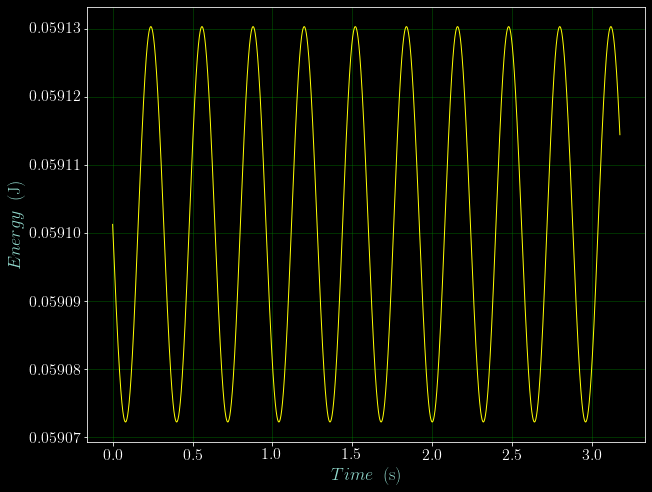

'\nEuler-Improved shows a more consistent value for energy conservation.  \nNote the graph below has a very small variance of total energy,\nshowing a somewhat constant, which is good.  \n'

In [12]:
t1, Ω1, θ1, E1 = euler_improved(20,0,0.0001)
"""
Euler-Improved shows a more consistent value for energy conservation.  
Note the graph below has a very small variance of total energy,
showing a somewhat constant, which is good.  
"""

##### The below is just me noodling around. 

Text(0, 0.5, '$Angle(radians)$')

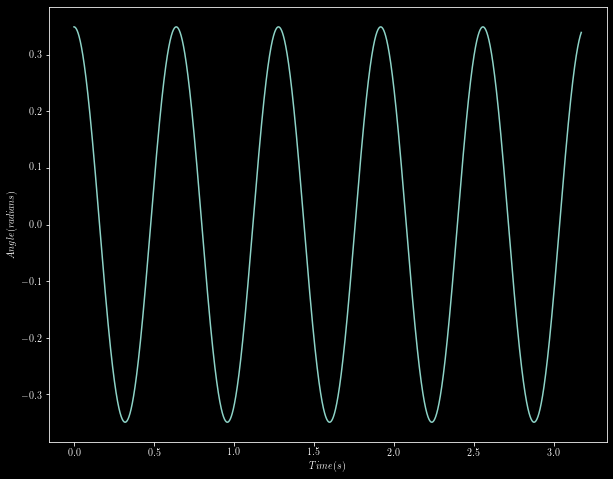

In [31]:
plt.plot(t1,θ1)
plt.xlabel('$Time(s)$')
plt.ylabel('$Angle(radians)$')

#### Now Here is my Euler code, but with the Boundary Conditions:

In [17]:
def euler_boundary_1(θ_zero, Ω_zero, Δt, g=9.80, L=0.1, m = 1., method = 'euler'):
    
    θ = [np.radians(θ_zero)] # sets up the list of positions in radians.
    Ω = [Ω_zero] # sets up the list of angular velocities
    t = [0.0] # sets up the list of times
    T = 2*np.pi*np.sqrt(L/g) # The Period of the pendulum system
    E = [(0.5*m*((L*Ω[-1])**2) + m*g*L*(1-np.cos(θ[-1])))]  # sets up a list of Total Energy
    
 
    while t[-1] <= 5*T:  # My while loop for the Euler method. It runs for 5 periods.
        
        if method == 'euler':
            Ω.append(Ω[-1] - g/L*np.sin(θ[-1])*Δt)
            
            if θ[-1] < -np.pi:
                θ[-1] = θ[-1] + 2*np.pi
            elif θ[-1] > np.pi:
                θ[-1] = θ[-1] - 2*np.pi
                
            θ.append(θ[-1] + (Ω[-1])*Δt)
            t.append(t[-1] + Δt)
            E.append(0.5*m*(L*Ω[-1])**2 + m*g*L*(1-np.cos(θ[-1])))    
            
    
    plt.plot(t, θ, linewidth=1, alpha=1, color='yellow', label = 'Theta')  
    plt.plot(t, Ω, linewidth=1, alpha=1, color='red', label = 'Omega')
    # plt.ylabel(r'$Angle(degrees)$', {'color': 'C0', 'fontsize': 18})
    plt.xlabel(r'$Time(s)$', {'color': 'C0', 'fontsize': 18} )
    plt.grid(color='g', linestyle='-', linewidth=0.75, alpha = 0.5)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.legend()
    plt.show()
    
    return t, Ω, θ, E

$$\textbf{See below for the 2 boundary plots:}$$

$$\text{The first plot is starting at}\, \frac{ \pi}{3 }\, \text{radians}$$
$$\text{and no initial angular velocity.}$$

$$\text{The Second plot is starting at}\,\frac{ \pi}{3 }\,\text{radians and}$$ 
$$ \frac{ \pi}{3 }\,\tiny{\frac{rad}{sec}}\,\small\text{initial angular velocity:} $$

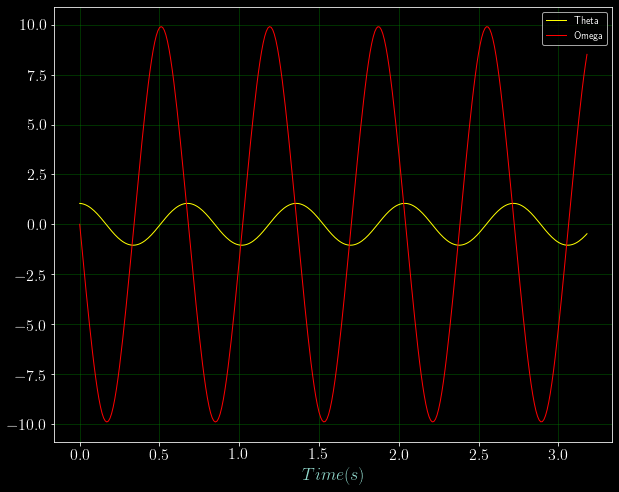

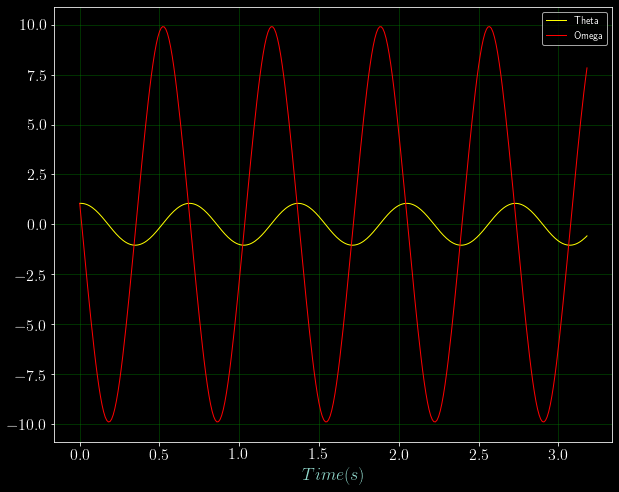

In [14]:


t2, Ω2, θ2, E2 = euler_boundary_1(60,0,0.01)



t3, Ω3, θ3, E3 = euler_boundary_1(60,np.pi/3,0.01)


## Phase space
Another way to visualize a dynamical system is to plot the velocity versus the position,<br>
or, in our case, the angular velocity versus the angle ($\omega$ vs $\theta$). Write code<br>
to make a single plot that shows the phase space trajectories for the cases<br>
- $\theta_0 = \pi/3$ rad and $\omega_0 = 0$ rad/s
- $\theta_0 = \pi/3$ rad and $\omega_0 = +\pi/3$ rad/s<br>
You will want to use periodic boundary conditions for $\theta$. 

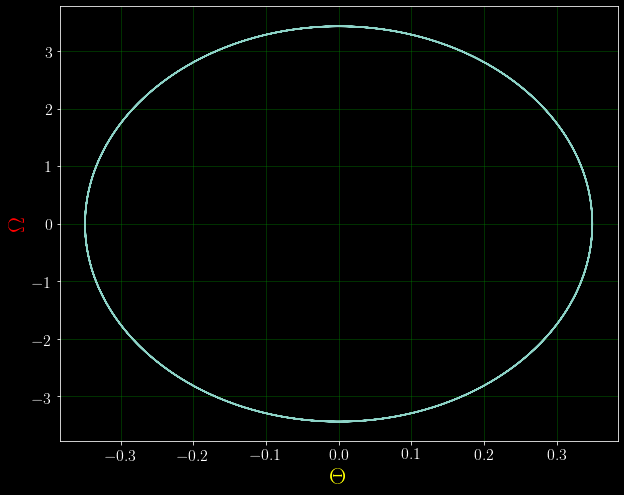

In [39]:
plt.plot(θ1, Ω1)
plt.xlabel('$\Theta$', color = 'yellow', size='24')
plt.ylabel('$\Omega$', color = 'red', size = '24')
plt.grid(color='g', linestyle='-', linewidth=0.75, alpha = 0.5)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [21]:
def euler_boundary_2(θ_zero, Ω_zero, Δt, g=9.80, L=0.1, m = 1., method = 'euler'):
    
    θ = [np.radians(θ_zero)] # sets up the list of positions in radians.
    Ω = [Ω_zero] # sets up the list of angular velocities
    t = [0.0] # sets up the list of times
    T = 2*np.pi*np.sqrt(L/g) # The Period of the pendulum system
    E = [(0.5*m*((L*Ω[-1])**2) + m*g*L*(1-np.cos(θ[-1])))]  # sets up a list of Total Energy
    
 
    while t[-1] <= 5*T:  # My while loop for the Euler method. It runs for 5 periods.
        
        if method == 'euler':
            Ω.append(Ω[-1] - g/L*np.sin(θ[-1])*Δt)
            
            if θ[-1] < -np.pi:
                θ[-1] = θ[-1] + 2*np.pi
            elif θ[-1] > np.pi:
                θ[-1] = θ[-1] - 2*np.pi
                
            θ.append(θ[-1] + (Ω[-1])*Δt)
            t.append(t[-1] + Δt)
            E.append(0.5*m*(L*Ω[-1])**2 + m*g*L*(1-np.cos(θ[-1])))    
            
    
    plt.plot(θ, Ω, linewidth=1, alpha=1, color='green', label = 'Theta')
    plt.xlabel('$\Theta$', color = 'yellow', size='24')
    plt.ylabel('$\Omega$', color = 'red', size = '24')
    plt.grid(color='g', linestyle='-', linewidth=0.75, alpha = 0.5)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.legend()
    plt.show()
    
    return t, Ω, θ, E

##### The below plots the first condition, initial angle of 60 degrees and initial angular velocity of zero:

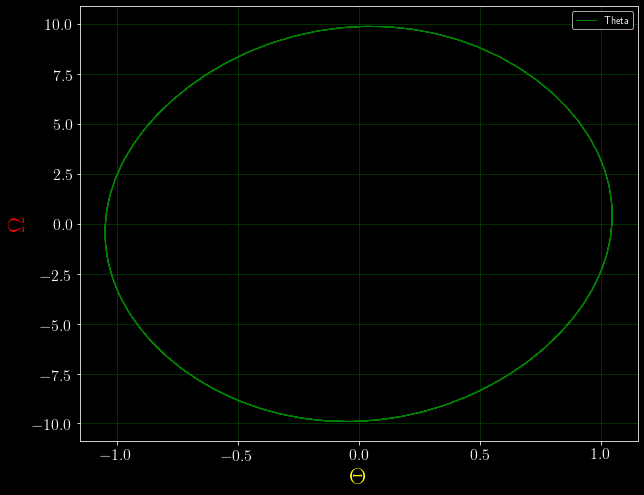

In [22]:
t4, Ω4, θ4, E4 = euler_boundary_2(60,0,0.01)

##### The below plots the second condition, initial angle of 60 degrees and initial angular velocity of (1/3)pi rad/sec:

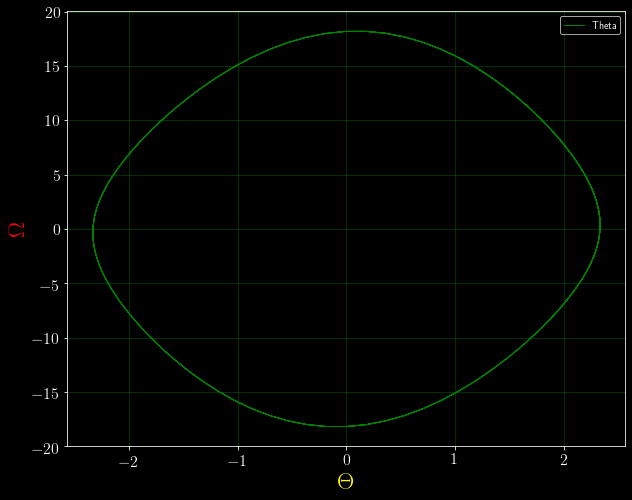

In [26]:
t5, Ω5, θ5, E5 = euler_boundary_2(60,5*np.pi,0.01)